In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

### mathematische Grundlagen

In [12]:
def sigmoid(x):
    sigmoid = 1 / (1 + np.exp(-x))
    return sigmoid

In [13]:
x = np.linspace(-10, 10, 100)
x

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
        -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
        -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
        -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
        -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
        -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
        -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
        -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
        -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
         0.50505051,   0.70707071,   0.90909091,   1.11111111,
         1.31313131,   1.51515152,   1.71717172,   1.91919192,
         2.12121212,   2.32323232,   2.52525253,   2.72

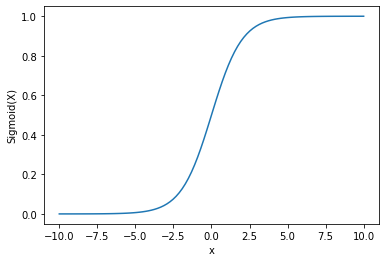

In [14]:
z = sigmoid(x)

ax = plt.plot(x, z)
plt.xlabel("x") 
plt.ylabel("Sigmoid(X)") 

plt.show() 

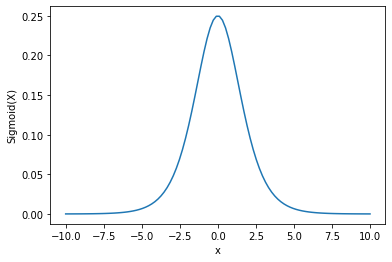

0.2493633927992353


In [15]:
#Ableitung der Sigmoid
ds = (np.exp(-x))/((1+np.exp(-x))**2)
ax = plt.plot(x, ds)
plt.xlabel("x") 
plt.ylabel("Sigmoid(X)") 

plt.show() 
print(max(ds))

### load calculated delta measures

In [20]:
data = pd.DataFrame(pd.read_csv('DE_attribution', index_col=0))
data = data[data.cosine != 0.00]
data

,manhattan,cosine,euclidean,label,author
"Schopenhauer,-Johanna_Die Tante.txt",1249.57,0.49,40.74,same,Schopenhauer
"Schopenhauer,-Johanna_Gabriele.txt",1346.51,0.53,44.11,same,Schopenhauer
"Gutzkow,-Karl_Die Ritter vom Geiste.txt",1570.48,1.04,49.39,different,Gutzkow
"Gutzkow,-Karl_Der Zauberer von Rom.txt",1595.14,0.96,50.85,different,Gutzkow
"Spielhagen,-Friedrich_Hammer und Ambo+í.txt",1652.88,1.01,51.73,different,Spielhagen
...,...,...,...,...,...
"Fontane,-Theodor_Irrungen Wirrungen.txt",2601.44,1.16,82.71,different,Fontane
"Fischer,-Caroline-Auguste_Gustavs Verirrungen.txt",2610.78,0.98,83.27,different,Fischer
"Freytag,-Gustav_Die Ahnen.txt",2630.41,1.19,81.60,different,Freytag
"Marlitt,-Eugenie_Die Frau mit den Karfunkelsteinen.txt",2673.07,1.27,82.10,different,Marlitt


In [16]:
x = data['cosine'].values.reshape(-1,1)
z = sigmoid(x)
ax = plt.plot(x, z)
plt.xlabel("x") 
plt.ylabel("Sigmoid(X)") 

plt.show() 

NameError: name 'sigmoid' is not defined

In [18]:
d = data.copy()
d.drop('manhattan', inplace=True, axis=1)
d.drop('euclidean', inplace=True, axis=1)
d.drop('author', inplace=True, axis=1)

cosine = d['cosine'].values.reshape(-1,1)  #np.unique machen?in Schleife unten werden trotzdem alle Zeilen erfasst damit
minx = min(cosine)
d

,Unnamed: 0,cosine,label
1,"Schopenhauer,-Johanna_Die Tante.txt",0.49,same
2,"Schopenhauer,-Johanna_Gabriele.txt",0.53,same
3,"Gutzkow,-Karl_Die Ritter vom Geiste.txt",1.04,different
4,"Gutzkow,-Karl_Der Zauberer von Rom.txt",0.96,different
5,"Spielhagen,-Friedrich_Hammer und Ambo+í.txt",1.01,different
...,...,...,...
5924,"Fontane,-Theodor_Irrungen Wirrungen.txt",1.16,different
5925,"Fischer,-Caroline-Auguste_Gustavs Verirrungen.txt",0.98,different
5926,"Freytag,-Gustav_Die Ahnen.txt",1.19,different
5927,"Marlitt,-Eugenie_Die Frau mit den Karfunkelste...",1.27,different


In [19]:
cos = np.unique(cosine)
minx

array([0.22])

### determine same and different authors in 1%-steps of cosine values

In [20]:
perc = 1.1
cos_range = max(cos)-min(cos)
n = np.arange(0.01, 1.01, 0.01)

for perc in n:
    for c in cos:
        if c <= minx + cos_range*perc:
            d.loc[d.cosine==float(c), np.around(perc, decimals=2)] = 'same'
        else:
             d.loc[d.cosine==float(c), np.around(perc, decimals=2)] = 'different'
d

,Unnamed: 0,cosine,label,0.01,0.02,0.03,0.04,0.05,0.06,0.07,...,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1.0
1,"Schopenhauer,-Johanna_Die Tante.txt",0.49,same,different,different,different,different,different,different,different,...,same,same,same,same,same,same,same,same,same,same
2,"Schopenhauer,-Johanna_Gabriele.txt",0.53,same,different,different,different,different,different,different,different,...,same,same,same,same,same,same,same,same,same,same
3,"Gutzkow,-Karl_Die Ritter vom Geiste.txt",1.04,different,different,different,different,different,different,different,different,...,same,same,same,same,same,same,same,same,same,same
4,"Gutzkow,-Karl_Der Zauberer von Rom.txt",0.96,different,different,different,different,different,different,different,different,...,same,same,same,same,same,same,same,same,same,same
5,"Spielhagen,-Friedrich_Hammer und Ambo+í.txt",1.01,different,different,different,different,different,different,different,different,...,same,same,same,same,same,same,same,same,same,same
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5924,"Fontane,-Theodor_Irrungen Wirrungen.txt",1.16,different,different,different,different,different,different,different,different,...,same,same,same,same,same,same,same,same,same,same
5925,"Fischer,-Caroline-Auguste_Gustavs Verirrungen.txt",0.98,different,different,different,different,different,different,different,different,...,same,same,same,same,same,same,same,same,same,same
5926,"Freytag,-Gustav_Die Ahnen.txt",1.19,different,different,different,different,different,different,different,different,...,same,same,same,same,same,same,same,same,same,same
5927,"Marlitt,-Eugenie_Die Frau mit den Karfunkelste...",1.27,different,different,different,different,different,different,different,different,...,different,different,different,different,different,same,same,same,same,same


In [21]:
d[d.cosine<=0.22]

,Unnamed: 0,cosine,label,0.01,0.02,0.03,0.04,0.05,0.06,0.07,...,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1.0
771,"May,-Karl_Old Surehand I.txt",0.22,same,same,same,same,same,same,same,same,...,same,same,same,same,same,same,same,same,same,same
2003,"May,-Karl_Im Reiche des silbernen Loewen I.txt",0.22,same,same,same,same,same,same,same,same,...,same,same,same,same,same,same,same,same,same,same


### calculate and visualize apha and beta errors

In [22]:
def normalized_cnf_matrix(cls):
    cnf = confusion_matrix(true_label, cols, normalize='all')
    fig, ax = plt.subplots(figsize=(5,5))
    #plt.figure(figsize=(5,5))  
    sns.heatmap(cnf, annot=True, cmap=sns.color_palette("Blues"), ax = ax); #annot=True to annotate cells

    
    tn, fp, fn, tp = cnf.ravel()
    
    error_dic = {'tn':tn, 'fp':fp, 'fn':fn, 'tp':tp}
    # labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(cls)
    ax.yaxis.set_ticklabels(cls)
    
    plt.savefig('CorpusDE_' + str(column) + '.png')    
    
    plt.show()
    
    return error_dic

In [23]:
true_label = np.array(d.label)
d.drop('cosine', inplace=True, axis=1)

d.reset_index(drop=True)
#d.drop('Unnamed: 0', inplace=True, axis=1)   #'unnamed: 0' in anderem Skript umbenennen

d.drop('label', inplace=True, axis=1)
d

,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,...,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1.00
1,different,different,different,different,different,different,different,different,different,different,...,same,same,same,same,same,same,same,same,same,same
2,different,different,different,different,different,different,different,different,different,different,...,same,same,same,same,same,same,same,same,same,same
3,different,different,different,different,different,different,different,different,different,different,...,same,same,same,same,same,same,same,same,same,same
4,different,different,different,different,different,different,different,different,different,different,...,same,same,same,same,same,same,same,same,same,same
5,different,different,different,different,different,different,different,different,different,different,...,same,same,same,same,same,same,same,same,same,same
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5924,different,different,different,different,different,different,different,different,different,different,...,same,same,same,same,same,same,same,same,same,same
5925,different,different,different,different,different,different,different,different,different,different,...,same,same,same,same,same,same,same,same,same,same
5926,different,different,different,different,different,different,different,different,different,different,...,same,same,same,same,same,same,same,same,same,same
5927,different,different,different,different,different,different,different,different,different,different,...,different,different,different,different,different,same,same,same,same,same


0.01


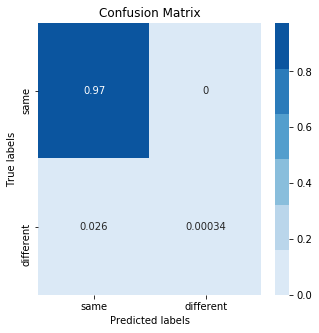

0.02


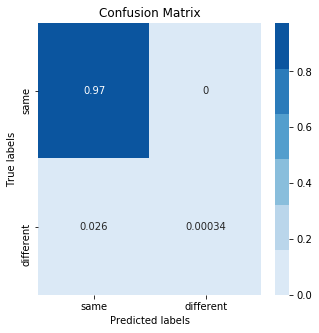

0.03


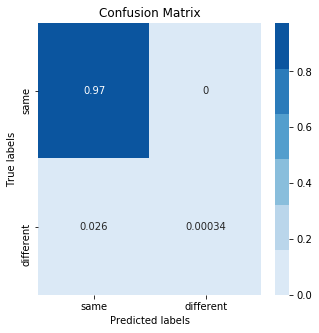

0.04


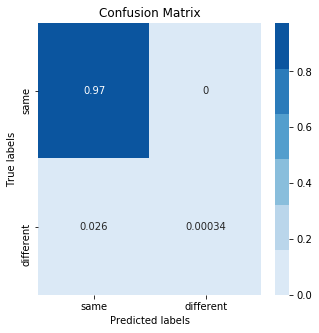

0.05


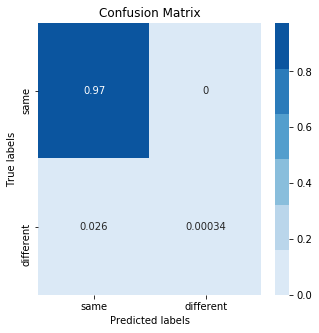

0.06


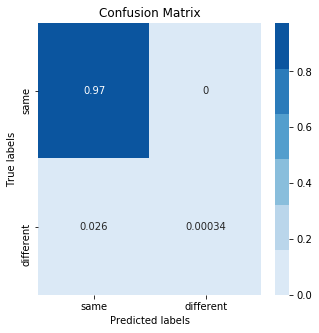

0.07


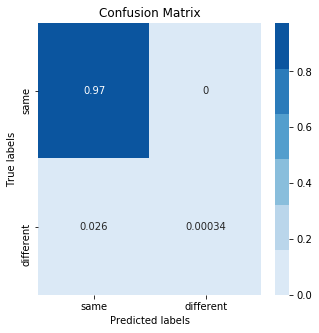

0.08


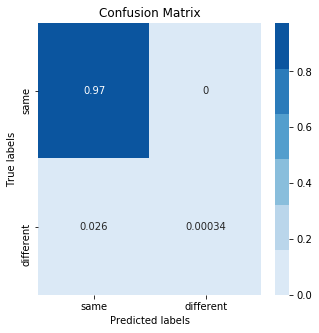

0.09


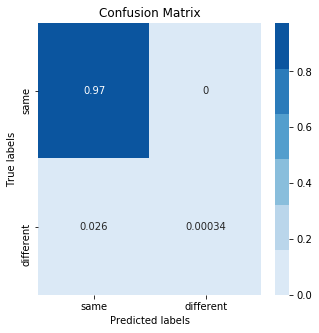

0.1


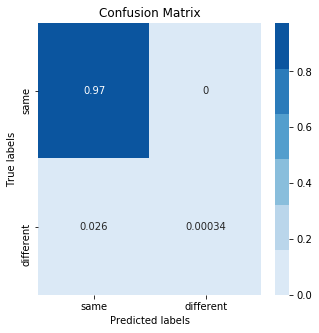

0.11


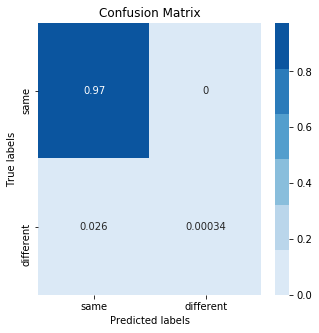

0.12


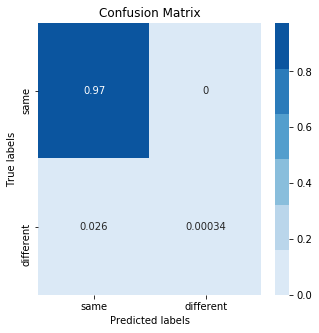

0.13


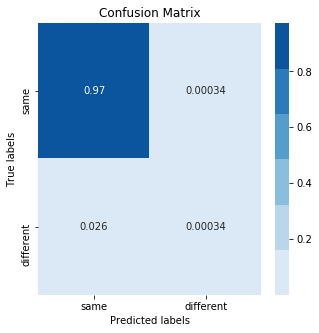

0.14


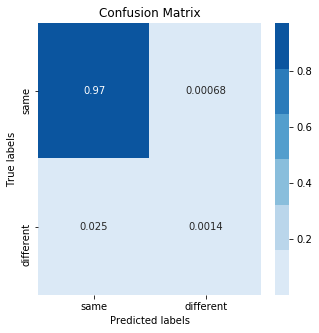

0.15


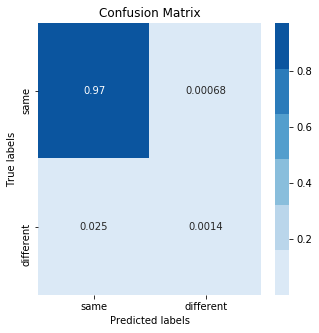

0.16


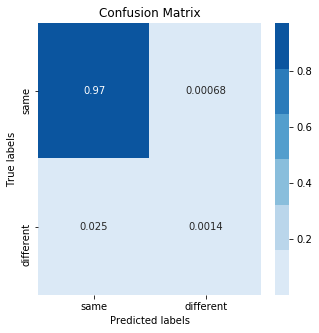

0.17


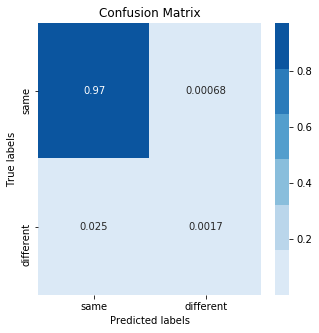

0.18


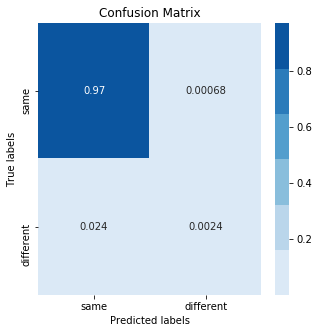

0.19


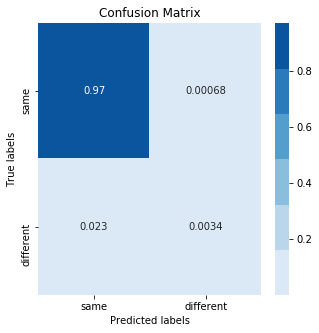

0.2


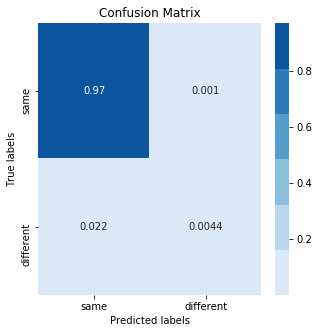

0.21


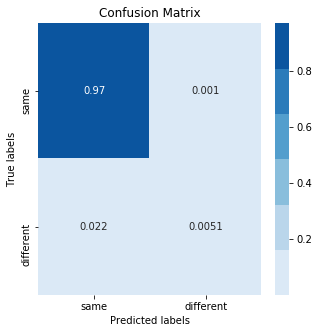

0.22


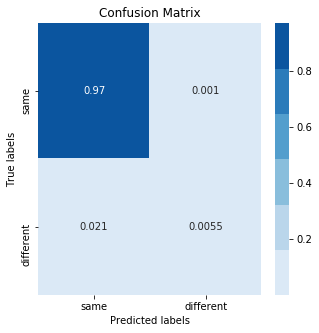

0.23


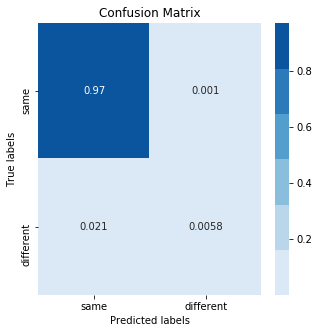

0.24


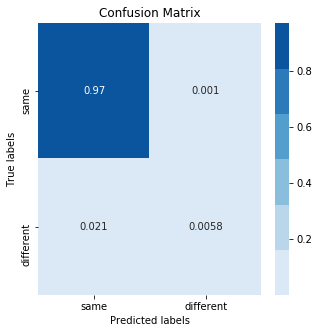

0.25


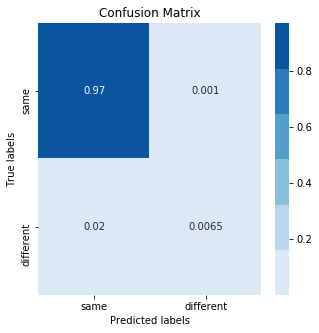

0.26


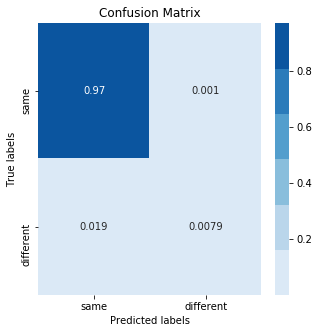

0.27


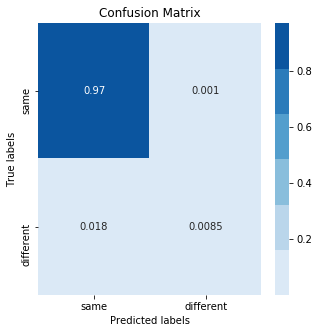

0.28


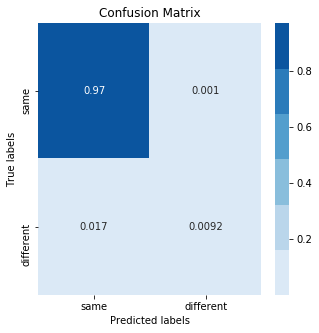

0.29


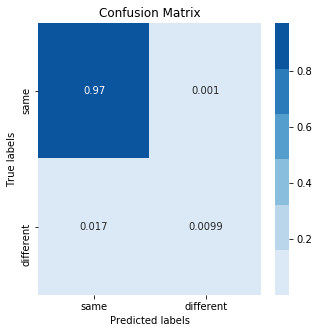

0.3


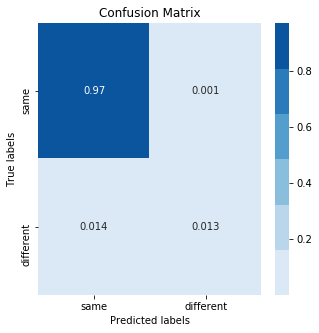

0.31


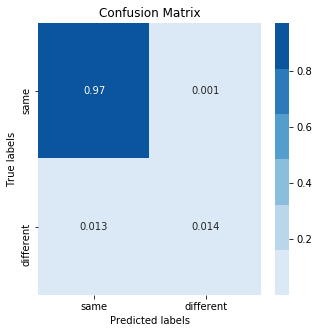

0.32


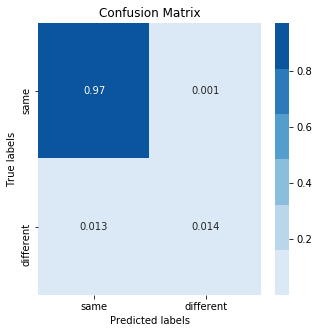

0.33


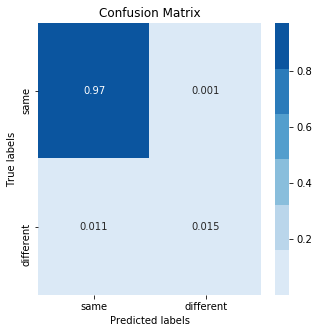

0.34


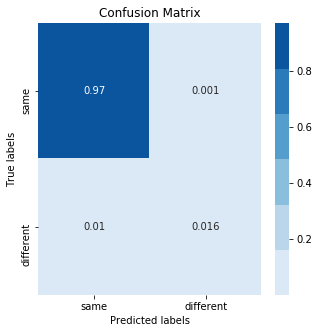

0.35


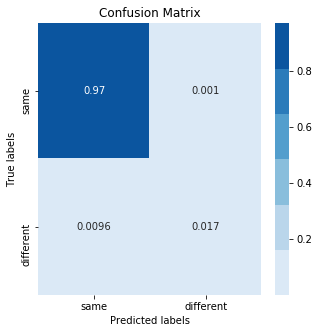

0.36


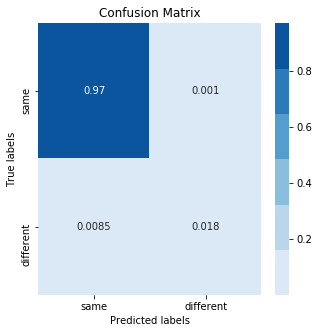

0.37


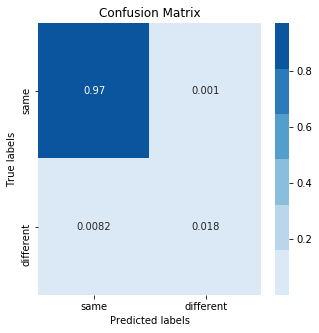

0.38


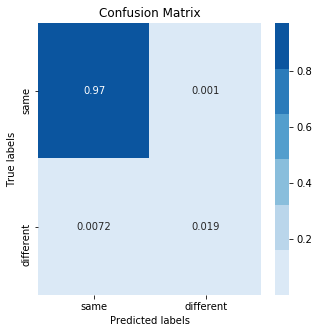

0.39


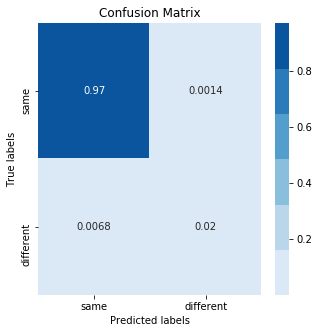

0.4


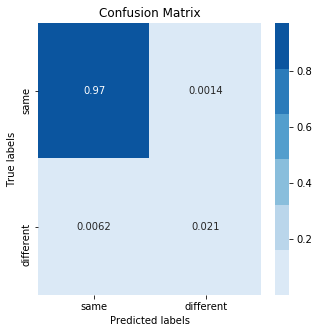

0.41


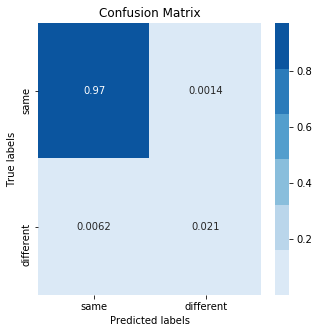

0.42


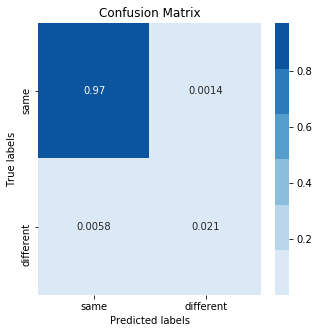

0.43


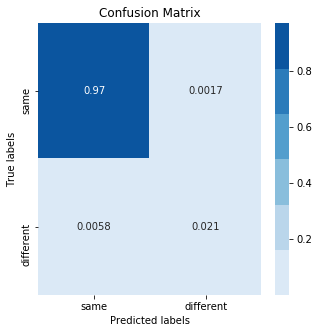

0.44


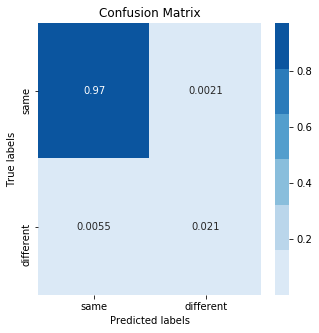

0.45


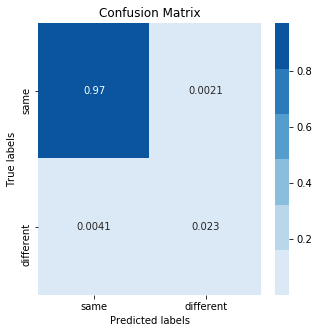

0.46


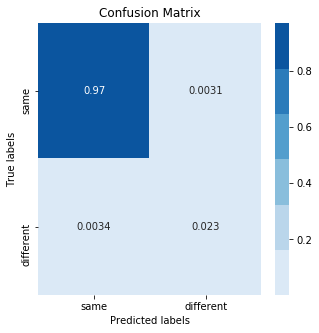

0.47


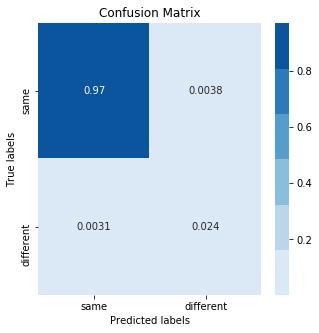

0.48


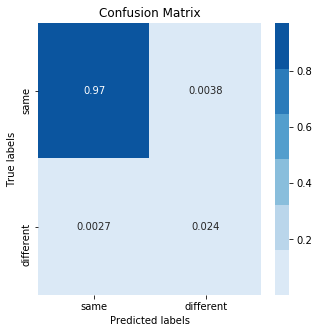

0.49


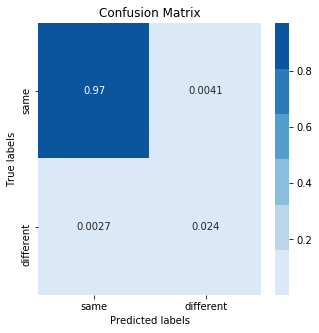

0.5


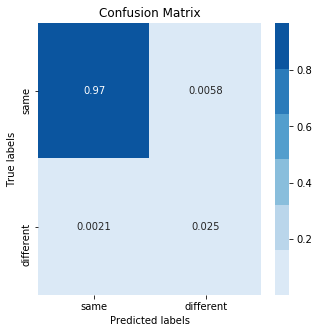

0.51


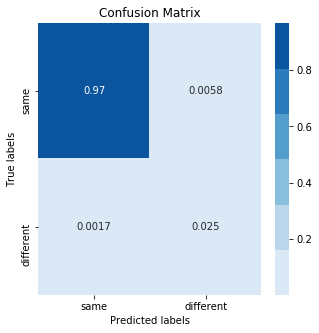

0.52


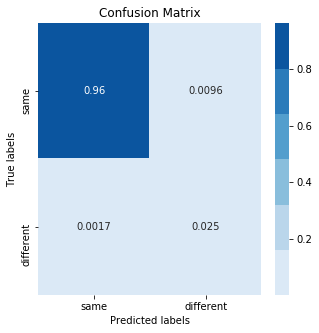

0.53


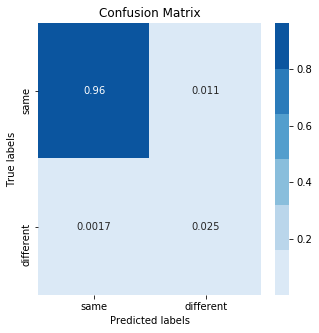

0.54


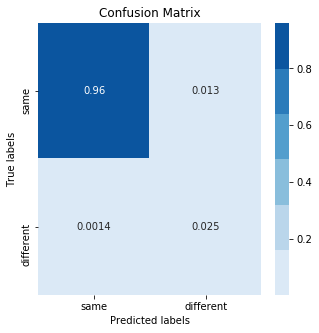

0.55


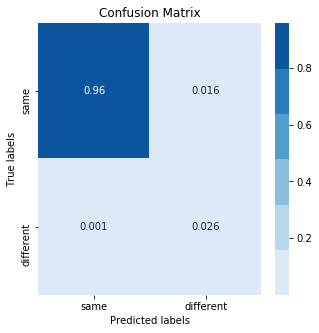

0.56


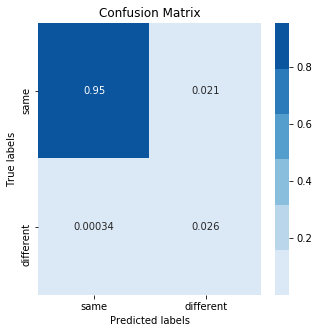

0.57


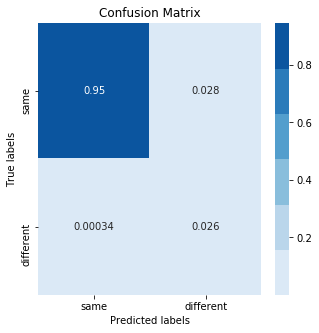

0.58


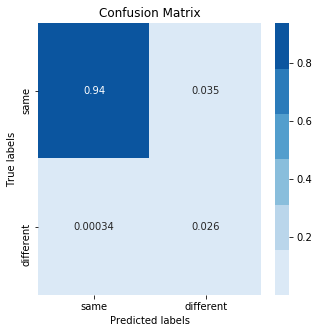

0.59


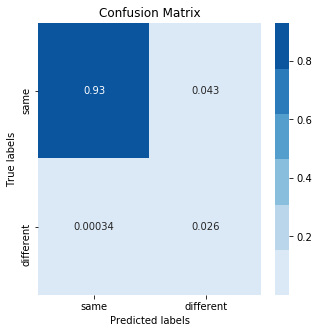

0.6


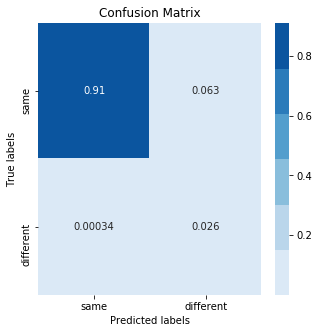

0.61


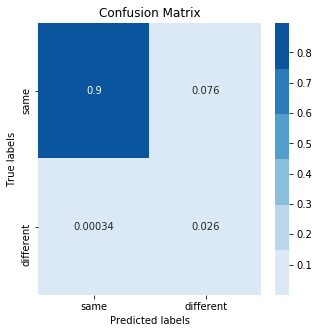

0.62


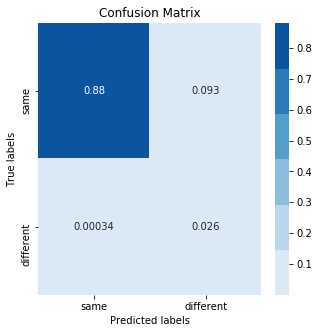

0.63


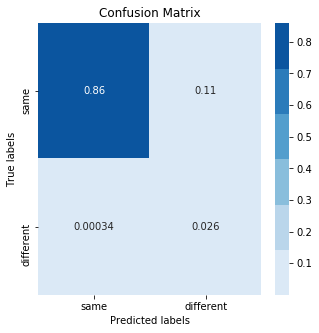

0.64


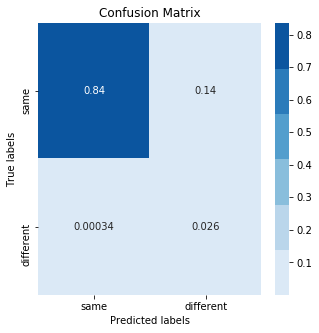

0.65


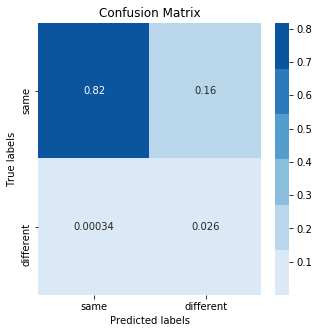

0.66


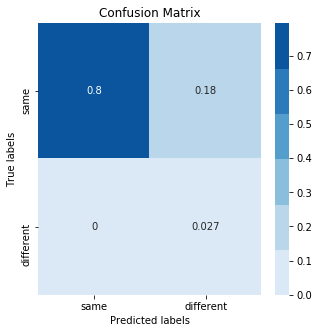

0.67


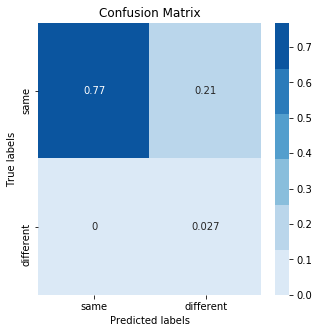

0.68


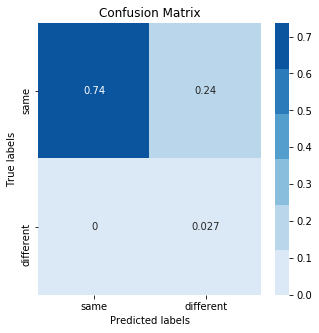

0.69


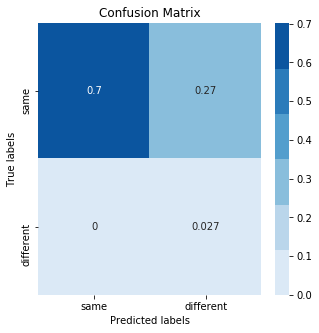

0.7


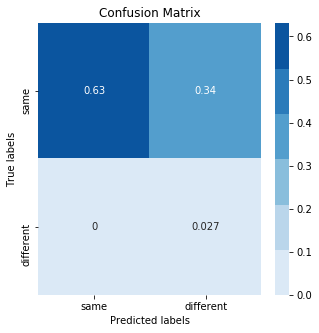

0.71


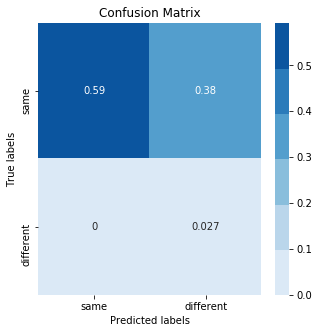

0.72


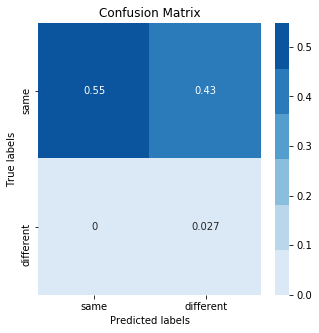

0.73


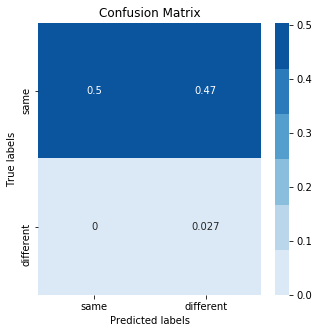

0.74


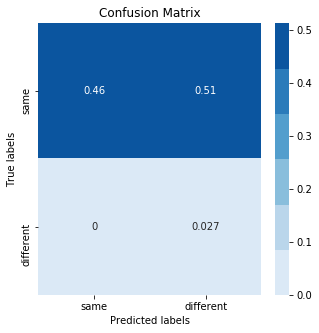

0.75


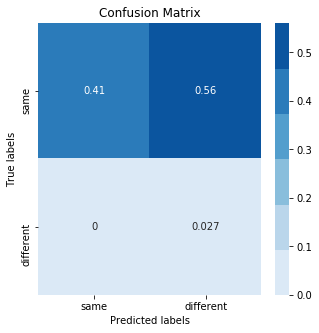

0.76


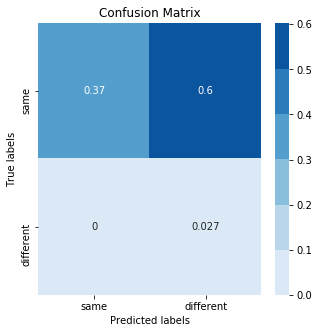

0.77


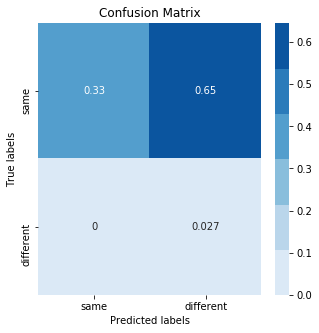

0.78


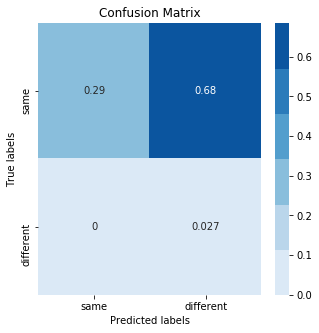

0.79


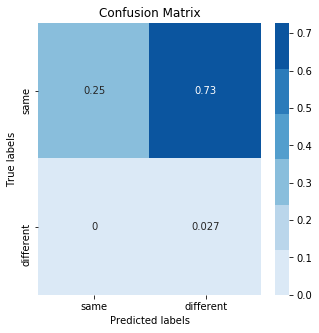

0.8


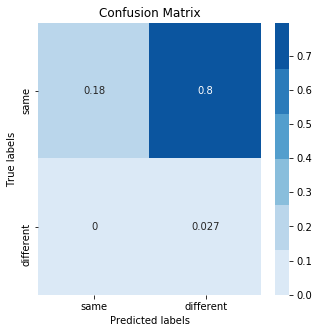

0.81


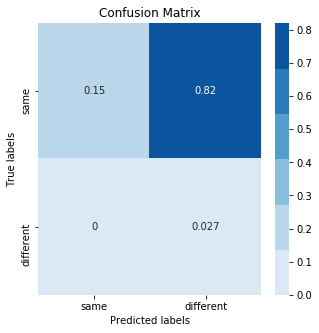

0.82


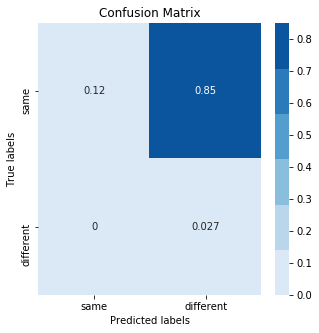

0.83


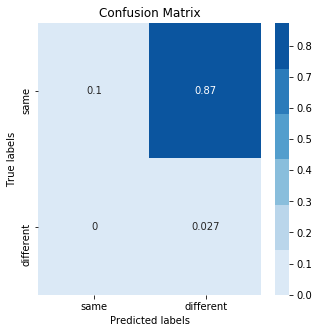

0.84


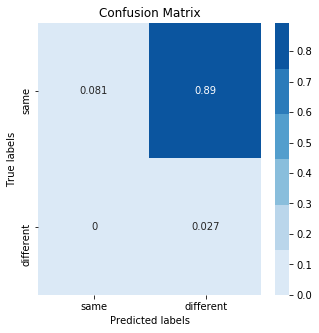

0.85


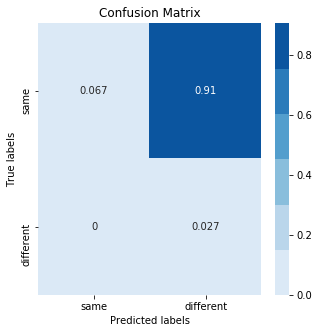

0.86


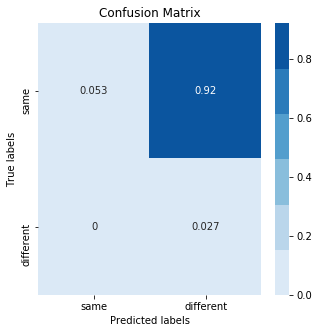

0.87


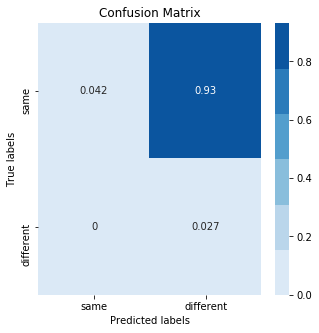

0.88


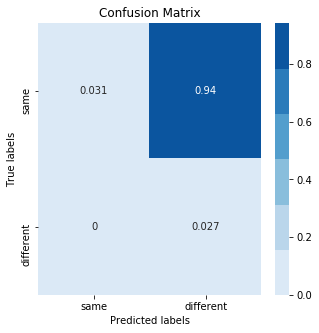

0.89


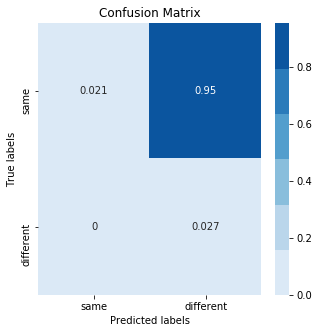

0.9


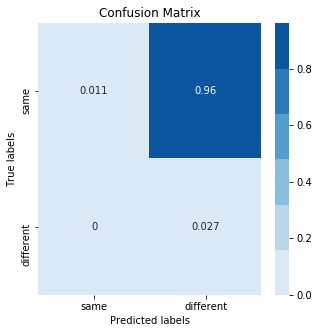

0.91


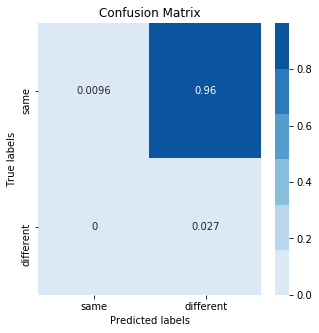

0.92


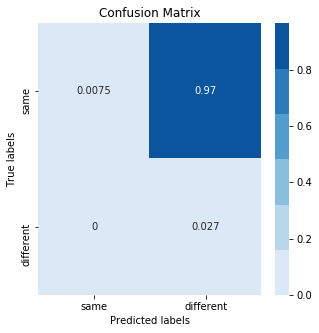

0.93


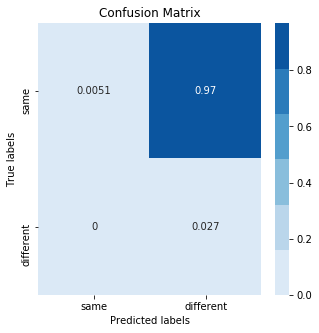

0.94


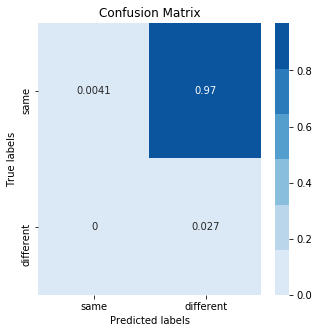

0.95


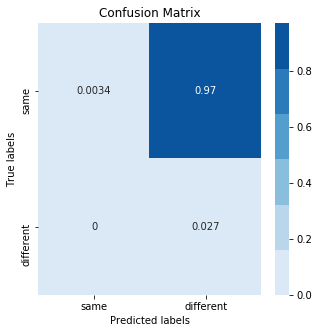

0.96


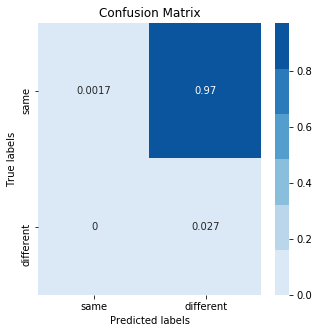

0.97


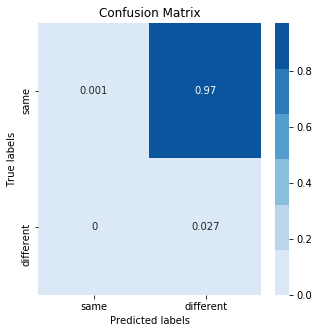

0.98


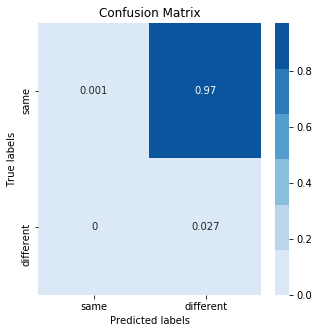

0.99


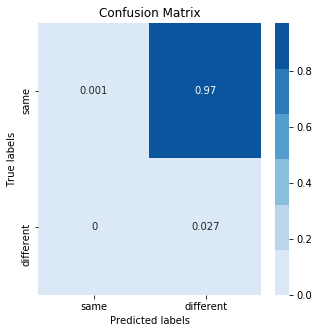

1.0


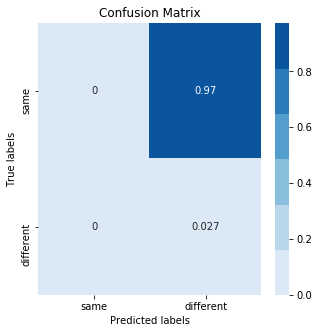

In [24]:
cls = ['same', 'different']
error_list=[]
error_dic={}
for i, column in enumerate(d):
    print(column)
    cols = np.array(d[column])
    error_dic = normalized_cnf_matrix(cls)
    error_dic['percentage'] = column
    error_list.append(error_dic)


In [72]:
errors = pd.DataFrame(error_list)
errors

,tn,fp,fn,tp,percentage
0,0.973342,0.000000,0.026316,0.000342,0.01
1,0.973342,0.000000,0.026316,0.000342,0.02
2,0.973342,0.000000,0.026316,0.000342,0.03
3,0.973342,0.000000,0.026316,0.000342,0.04
4,0.973342,0.000000,0.026316,0.000342,0.05
...,...,...,...,...,...
95,0.001709,0.971634,0.000000,0.026658,0.96
96,0.001025,0.972317,0.000000,0.026658,0.97
97,0.001025,0.972317,0.000000,0.026658,0.98
98,0.001025,0.972317,0.000000,0.026658,0.99


In [73]:
minc = min(cos)
maxc = max(cos)
errors.name = ('min: {}, max: {}'.format(minc, maxc))

In [74]:
errors.name

'min: 0.22, max: 1.32'

In [28]:
errors.to_csv('CorpusDE_errors')

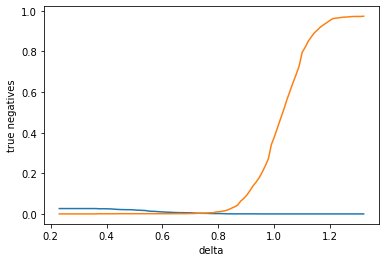

In [45]:
n = np.arange(0.01, 1.01, 0.01)
x = []
for perc in n:
    x.append(minc + cos_range*perc)
z = errors['fn']
y = errors['fp']
ax = plt.plot(x, z)
ax = plt.plot(x, y)
plt.xlabel("delta") 
plt.ylabel("true negatives") 

plt.show() 

In [86]:
errors2 = errors.copy()
#errors2.drop('tn', inplace=True, axis=1)
#errors2.drop('tp', inplace=True, axis=1)
errors2.drop('percentage', inplace=True, axis=1)
errors2

,tn,fp,fn,tp
0,0.973342,0.000000,0.026316,0.000342
1,0.973342,0.000000,0.026316,0.000342
2,0.973342,0.000000,0.026316,0.000342
3,0.973342,0.000000,0.026316,0.000342
4,0.973342,0.000000,0.026316,0.000342
...,...,...,...,...
95,0.001709,0.971634,0.000000,0.026658
96,0.001025,0.972317,0.000000,0.026658
97,0.001025,0.972317,0.000000,0.026658
98,0.001025,0.972317,0.000000,0.026658


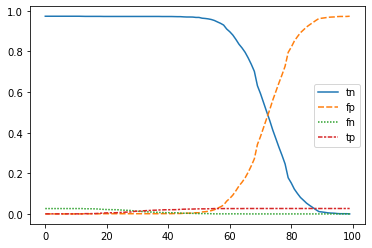

In [87]:
sns.lineplot(data=errors2)

In [81]:
df2=errors2.stack().reset_index()
df2.columns = ['Series','Event','Values']
print(df2)

     Series Event    Values
0         0    fp  0.000000
1         0    fn  0.026316
2         1    fp  0.000000
3         1    fn  0.026316
4         2    fp  0.000000
..      ...   ...       ...
195      97    fn  0.000000
196      98    fp  0.972317
197      98    fn  0.000000
198      99    fp  0.973342
199      99    fn  0.000000

[200 rows x 3 columns]


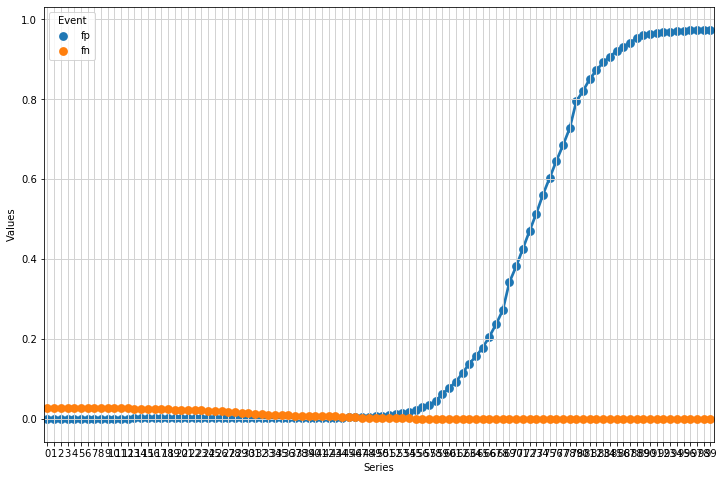

In [82]:
plt.figure(figsize=(12,8))
ax = sns.pointplot(x='Series', y='Values', hue='Event',data=df2)
ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)
ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
plt.show()

In [42]:
# visulisiere alpha und beta Fehler
# lege Delta-Kurven der verschiedenen Korpora übereinander, auch der Fehler evtl?
# verschiedene MFW-Werte austesten
# Streuung der Korpora